In [1]:
!gdown --id 1cVzk_mb36xfFkaT_Tv4arraKZ52ekoK1

/n/home12/ramith/.local/lib/python3.8/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cVzk_mb36xfFkaT_Tv4arraKZ52ekoK1
To: /n/home12/ramith/wadduwagelab/SERS-interpretability/AllBacteria_DataForclustering-to-colab.csv
100%|██████████████████████████████████████| 1.26M/1.26M [00:00<00:00, 23.6MB/s]


In [2]:
from numpy import genfromtxt
import numpy as np

In [3]:
data = genfromtxt('AllBacteria_DataForclustering-to-colab.csv', delimiter=',',dtype='str')
data = np.char.lower(data) #convert to lowercase

In [4]:
print(f"total rows : {data.shape[0]}")
print(f"total columns : {data.shape[1]}")

total rows : 715
total columns : 273


In [5]:
data[0,:].shape

(273,)

In [6]:
new_species_indices = [i for i, item in enumerate(data[0,:]) if item.startswith('name')]
len(new_species_indices)

29

In [7]:
data[0,new_species_indices]

array(['name ', 'name', 'name', 'name', 'name', 'name', 'name', 'name',
       'name', 'name', 'name', 'name', 'name', 'name', 'name', 'name',
       'name', 'name', 'name', 'name', 'name', 'name', 'name', 'name',
       'name', 'name', 'name', 'name', 'name'], dtype='<U32')

In [8]:
wavelengths = data[1:,2]

In [9]:
num_samples = 0

dataset = {}

for idx,new_start in enumerate(new_species_indices):
  #extract end point of the data block
  if(idx == len(new_species_indices) - 1):
    end = data.shape[1] #last column
  else:
    end = new_species_indices[idx+1]

  #extract concentration
  if('conc' in data[0,new_start+1]):
    concentration = data[1,new_start+1] 
  else:
    raise ValueError(f"Expected 'concentration' at position {new_start+1}, but found {data[0,new_start+1]} instead.")

  bacteria_name = data[1,new_start]
  data_block = data[:,new_start:end]

  print(bacteria_name, end = " {")
  print(concentration, end = "}\n")

  #add new_entry for the bacteria if not in dict:
  if(bacteria_name not in dataset.keys()):
    dataset[bacteria_name] = {}
  
  #add new array within concentration level is not added previously
  if(concentration not in dataset[bacteria_name].keys()):
    dataset[bacteria_name][concentration] = []

  measurement_idxs = [i for i, item in enumerate(data[0,new_start:end]) if 'meas' in item]

  # print(data_block)
  for m_idx in measurement_idxs:
    measurement = data_block[1:, m_idx]

    dataset[bacteria_name][concentration].append(measurement)
    num_samples += 1


staphylococcus aureus {106cfu/ml}
staphylococcus aureus {105 cfu/ml}
staphylococcus aureus {104cfu/ml}
pseudomonas aeruginosa {106cfu/ml}
pseudomonas aeruginosa {105cfu/ml}
pseudomonas aeruginosa {104cfu/ml}
enterobacter cloaceae {106cfu/ml}
enterobacter cloaceae {105cfu/ml}
enterobacter cloaceae {104cfu/ml}
enterobacter cloaceae {103cfu/ml}
escherichia .coli (e. coli) {106 cfu/ml}
escherichia .coli (e. coli) {105 cfu/ml}
escherichia .coli (e. coli) {104 cfu/ml}
escherichia .coli (e. coli) {103 cfu/ml}
escherichia .coli (e. coli) {102 cfu/ml}
klebsiella pneumoniae {106 cfu/ml}
klebsiella pneumoniae {105 cfu/ml}
klebsiella pneumoniae {104 cfu/ml}
klebsiella pneumoniae {missing}
micobacterium smegmatis {108 cfu/ml}
micobacterium smegmatis {106 cfu/ml}
micobacterium smegmatis {105 cfu/ml}
micobacterium smegmatis {104 cfu/ml}
micobacterium smegmatis {103 cfu/ml}
micobacterium tuberculosis h37ra {108 cfu/ml}
micobacterium tuberculosis h37ra {106 cfu/ml}
micobacterium tuberculosis h37ra {105

In [10]:
for bac in dataset.keys():
  print(bac)
  concens =  dataset[bac].keys()

  for concen in dataset[bac].keys():
    print(concen, len(dataset[bac][concen] ))

staphylococcus aureus
106cfu/ml 5
105 cfu/ml 6
104cfu/ml 5
pseudomonas aeruginosa
106cfu/ml 8
105cfu/ml 6
104cfu/ml 5
enterobacter cloaceae
106cfu/ml 7
105cfu/ml 6
104cfu/ml 5
103cfu/ml 5
escherichia .coli (e. coli)
106 cfu/ml 7
105 cfu/ml 8
104 cfu/ml 7
103 cfu/ml 7
102 cfu/ml 5
klebsiella pneumoniae
106 cfu/ml 9
105 cfu/ml 8
104 cfu/ml 4
missing 7
micobacterium smegmatis
108 cfu/ml 7
106 cfu/ml 7
105 cfu/ml 7
104 cfu/ml 6
103 cfu/ml 7
micobacterium tuberculosis h37ra
108 cfu/ml 7
106 cfu/ml 6
105 cfu/ml 6
104 cfu/ml 7
103 cfu/ml 6


In [11]:
len(dataset["staphylococcus aureus"]["106cfu/ml"])

5

In [12]:
def if_match(source, own_keys, dict_):
    found = 0
    
    for tkey_1 in dict_.keys():
        # for tkey_2 in dict_[tkey_1].keys():
        for idx, target in enumerate(dict_[tkey_1]):
            if(np.array_equal(source, target)):
                print(f"conflict in {own_keys[0]},{own_keys[1]},{own_keys[2]} == {tkey_1},{idx}")
                found += 1
    

    if(found>0):
        print(f"{found} conflicts")
        return 1           

In [17]:
def remove_duplicates(dataset):

    new_unique_waves = {}

    for skey_1 in dataset.keys():
        for skey_2 in dataset[skey_1].keys():
            
            print(skey_1, skey_2)
            for idx, source in enumerate(dataset[skey_1][skey_2]):

                if(if_match(source,[skey_1, skey_2, idx], new_unique_waves)):
                    continue
                else:
                    if(skey_1 in new_unique_waves.keys()):
                        new_unique_waves[skey_1].append(source)
                    else:
                        new_unique_waves[skey_1] = []
                        new_unique_waves[skey_1].append(source)
                        
    return new_unique_waves

In [18]:
new_unique_waves = remove_duplicates(dataset)

staphylococcus aureus 106cfu/ml
conflict in staphylococcus aureus,106cfu/ml,4 == staphylococcus aureus,0
1 conflicts
staphylococcus aureus 105 cfu/ml
staphylococcus aureus 104cfu/ml
pseudomonas aeruginosa 106cfu/ml
pseudomonas aeruginosa 105cfu/ml
pseudomonas aeruginosa 104cfu/ml
enterobacter cloaceae 106cfu/ml
enterobacter cloaceae 105cfu/ml
enterobacter cloaceae 104cfu/ml
enterobacter cloaceae 103cfu/ml
escherichia .coli (e. coli) 106 cfu/ml
escherichia .coli (e. coli) 105 cfu/ml
escherichia .coli (e. coli) 104 cfu/ml
escherichia .coli (e. coli) 103 cfu/ml
escherichia .coli (e. coli) 102 cfu/ml
conflict in escherichia .coli (e. coli),102 cfu/ml,0 == escherichia .coli (e. coli),11
1 conflicts
conflict in escherichia .coli (e. coli),102 cfu/ml,1 == escherichia .coli (e. coli),12
1 conflicts
conflict in escherichia .coli (e. coli),102 cfu/ml,2 == escherichia .coli (e. coli),13
1 conflicts
klebsiella pneumoniae 106 cfu/ml
klebsiella pneumoniae 105 cfu/ml
conflict in klebsiella pneumoniae

In [19]:
save_dir = '/n/holyscratch01/wadduwage_lab/ramith/SERS'

In [22]:
import os
import random

In [26]:
for key in new_unique_waves.keys():
    
    
    
    class_ = key
    #shuffle examples randomly
    random.shuffle(new_unique_waves[class_])
    
    try:
        os.mkdir(f"{save_dir}/train/{class_}")
        os.mkdir(f"{save_dir}/val/{class_}")
        os.mkdir(f"{save_dir}/test/{class_}")
    except:
        print(f"Directory of class {class_} already exists !!!")
   
    t = int(len(new_unique_waves[class_])*0.6)
    v = int(len(new_unique_waves[class_])*0.8)
    
    ## save trainset waves:
    for i in range(0,t):
        np.save(f'{save_dir}/train/{class_}/{class_}_{i}.npy', new_unique_waves[class_][i])
        
    ## save valset waves:
    for i in range(t,v):
        np.save(f'{save_dir}/val/{class_}/{class_}_{i}.npy', new_unique_waves[class_][i])
        
    ## save testset waves:
    for i in range(v,len(new_unique_waves[class_])):
        np.save(f'{save_dir}/test/{class_}/{class_}_{i}.npy', new_unique_waves[class_][i])
        
        
    print(class_ , end =  " -> ")
    print(len(new_unique_waves[key]), end = " -> ")
    
    print(f" [0,{t}], [{t}, {v}],  [{v},:]")

staphylococcus aureus -> 15 ->  [0,9], [9, 12],  [12,:]
pseudomonas aeruginosa -> 19 ->  [0,11], [11, 15],  [15,:]
enterobacter cloaceae -> 23 ->  [0,13], [13, 18],  [18,:]
escherichia .coli (e. coli) -> 31 ->  [0,18], [18, 24],  [24,:]
klebsiella pneumoniae -> 25 ->  [0,15], [15, 20],  [20,:]
micobacterium smegmatis -> 33 ->  [0,19], [19, 26],  [26,:]
micobacterium tuberculosis h37ra -> 24 ->  [0,14], [14, 19],  [19,:]


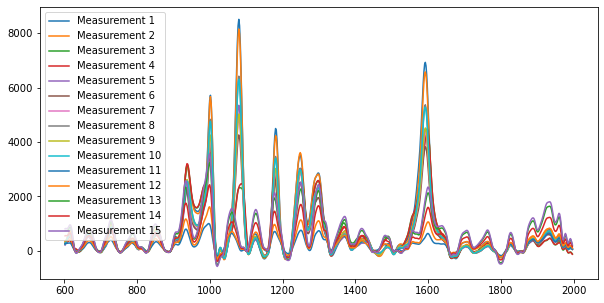

In [24]:
import matplotlib.pyplot as plt
# For each waveform, plot a line
waveforms = new_unique_waves['staphylococcus aureus']

fig, ax = plt.subplots(figsize=(10,5))

# For each waveform, plot a line
for i, waveform in enumerate(waveforms):
    ax.plot(wavelengths.astype(float), waveforms[i].astype(float), label=f'Measurement {i+1}')

    
# Add a legend
ax.legend()

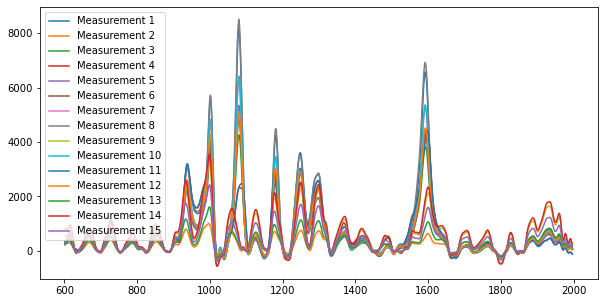

In [27]:
import matplotlib.pyplot as plt
# For each waveform, plot a line
waveforms = new_unique_waves['staphylococcus aureus']

fig, ax = plt.subplots(figsize=(10,5))

# For each waveform, plot a line
for i, waveform in enumerate(waveforms):
    ax.plot(wavelengths.astype(float), waveforms[i].astype(float), label=f'Measurement {i+1}')

    
# Add a legend
ax.legend()
